# Exploration of the Data

Within the following, both the structure of the data-set, the task, as well as various files will be explored. As areminder, I am working with a data-set from Wanjia et al, 2021: [Abrupt hippocampal remapping signals resolution of memory interference](https://openneuro.org/datasets/ds003707/versions/1.0.0)

## Structure of the Data Exploration Notebook
In the first part I will outline the general structure of the data set. Using the `pybids` module, the structure of the data set will be explored. 

Following this, using one subject as an example, the anatomical and functional files will be explored. 

## Exploration of the Dataset

In [1]:
#import a module to supress warnings
import warnings
warnings.simplefilter("once")

#Import of the BIDSLayout to help exploration of the BIDS dataset. 
from bids import BIDSLayout

#The path to the BIDS dataset. 
data_path = "/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/"

#Application of the BIDSLayout function, followed by printing it.
layout = BIDSLayout(data_path) 
print(layout)

#Import os module to allow easier execution of os-related task
import os

BIDS Layout: ...ngsmodul/project/data/ds003707 | Subjects: 36 | Sessions: 0 | Runs: 288


There is only one session, here shown as zero sessions. Overall, there are 8 runs per participant, equaling 288 runs overall.

The dataset originally contained 36 participants. As the the dorsal part of participant 33's cortex within the t1w image is cut-off, this participants was excluded: 

In [22]:
#!rm -r /home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-33
#This leads to an updated sample size of:
layout = BIDSLayout(data_path) 
print(layout)

BIDS Layout: ...ngsmodul/project/data/ds003707 | Subjects: 35 | Sessions: 0 | Runs: 280


The updated sample size is therefore 35.

There are 8 runs, these are related to two different tasks:

In [3]:
#What are the task?
tasks = layout.get_tasks()
print("There are the following tasks: %s" %tasks)

#How many sessions are there?
layout.get_session()

There are the following tasks: ['scene', 'obj']


[]

The tasks are shown above. Only a single sessions exists, but the command gives an empty output. 

Overall for each participant there are several files:

In [4]:
files_sub1 = layout.get(subject = "06")
print("The total number of files for subject 06 is: {}.".format(len(files_sub1)))
all_files = layout.get()
print("The total amount of files is: {}.".format(len(all_files)))

The total number of files for subject 06 is: 32.
The total amount of files is: 1157.


There are 32 files for the first subject.These include files of the following file types: `.json`, `.nii.gz` and event files with a `.tsv` ending. 

There are both anatomic T1w and T2w images available, as well as functional images for both tasks.

The respective files for each task are:

In [5]:
sub_10_scene = layout.get(subject='06', return_type='file', task="scene", extension='nii.gz')

#Importing a package to make output more readable. 
from  pprint import pprint
pprint(sub_10_scene)
print("There are {} runs for the task scene." .format(len(sub_10_scene)))

['/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-01_bold.nii.gz',
 '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-03_bold.nii.gz',
 '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-04_bold.nii.gz',
 '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-05_bold.nii.gz',
 '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-06_bold.nii.gz',
 '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-07_bold.nii.gz']
There are 6 runs for the task scene.


It is apparent, that the 6 runs for the scene task are not continously numbered. Why this is the case will be explained later!

Now to the object task:

In [6]:
sub_06_object = layout.get(subject='06', return_type='file', task="obj", extension='nii.gz')

#Importing a package to make output more readable. 
from  pprint import pprint
pprint(sub_06_object)
print("There are {} runs for the task object." .format(len(sub_06_object)))

['/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-obj_run-02_bold.nii.gz',
 '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-obj_run-08_bold.nii.gz']
There are 2 runs for the task object.


Now that the basic structure is known, what is there to explore within the dataset? Which `entities` does pybids detect?

In [7]:
layout_entities = layout.get_entities()
layout_entities.keys()

dict_keys(['subject', 'session', 'task', 'acquisition', 'ceagent', 'reconstruction', 'direction', 'run', 'proc', 'modality', 'echo', 'flip', 'inv', 'mt', 'part', 'recording', 'space', 'suffix', 'scans', 'fmap', 'datatype', 'extension', 'Modality', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturersModelName', 'InstitutionName', 'InstitutionalDepartmentName', 'InstitutionAddress', 'DeviceSerialNumber', 'StationName', 'BodyPartExamined', 'PatientPosition', 'ProcedureStepDescription', 'SoftwareVersions', 'MRAcquisitionType', 'SeriesDescription', 'ProtocolName', 'ScanningSequence', 'SequenceVariant', 'ScanOptions', 'SequenceName', 'ImageType', 'SeriesNumber', 'AcquisitionTime', 'AcquisitionNumber', 'SliceThickness', 'SAR', 'EchoTime', 'RepetitionTime', 'InversionTime', 'FlipAngle', 'PartialFourier', 'BaseResolution', 'ShimSetting', 'TxRefAmp', 'PhaseResolution', 'ReceiveCoilName', 'ReceiveCoilActiveElements', 'PulseSequenceDetails', 'ConsistencyInfo', 'PercentPhaseFOV', 'PhaseEncodingS

This is a lot of output - but basically there are a lot of potential parameters that can be explored. 

Slice timing, repetition time etc. will later be explored in more detail. In the following section, a overview report is generated for the different the anatomic images, as well as the functional runs. 

In [23]:
warnings.filterwarnings("ignore")
from bids.reports import BIDSReport  #Import of the 'report' function. 
report = BIDSReport(layout);

counter = report.generate()

Number of patterns detected: 1
Remember to double-check everything and to replace <deg> with a degree symbol.


In [24]:
main_report = counter.most_common()[0][0]
print(main_report)

In session None, MR data were acquired using a 3-Tesla Siemens Skyra MRI scanner.
	One run of T1-weighted segmented k-space, spoiled, and MAG prepared gradient recalled and inversion recovery (GR/IR) single-echo structural MRI data were collected (256 slices; repetition time, TR=2500ms; echo time, TE=3.43ms; flip angle, FA=7<deg>; field of view, FOV=176x256mm; matrix size=176x256; voxel size=1x1x1mm).
	One run of T2-weighted segmented k-space, spoiled, and oversampling phase spin echo (SE) single-echo structural MRI data were collected (65 slices; repetition time, TR=13520ms; echo time, TE=88ms; flip angle, FA=150<deg>; field of view, FOV=220x220mm; matrix size=512x512; voxel size=0.43x0.43x2mm).
	Two runs of objects old new identification segmented k-space and steady state echo planar (EP) single-echo fMRI data were collected (72 slices in interleaved ascending order; repetition time, TR=2000ms; echo time, TE=36ms; flip angle, FA=90<deg>; field of view, FOV=211x211mm; matrix size=124x

For all image aquisitions a 3T Siemens scanner was used.

Besides basic metrics, it also becomes apparent that the slice number for the T2w image is low - this might be related to it being a partial image. As similar number of slices was aquired for the functional image. 

Furthermore, there are 8 functional runs, split into the two tasks, as explained before. Both were obtained using single echo imaging. More about those in a bit!

## Anatomic Exploration

For the anatomic exploration, only the T1w images will be looked at in detail. 

Firstly, the necessary modules will be loaded:

In [25]:
warnings.filterwarnings("ignore")
from nilearn.plotting import plot_anat, plot_img, view_img 
from nilearn.image import mean_img
from myst_nb import glue
import matplotlib.pyplot as plt

#Files paths for all files needed in this section:
data_path_t1w_sub06 = '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/anat/sub-06_T1w.nii.gz'
data_path_t2w_sub06 = '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/anat/sub-06_T2w.nii.gz'

#Object from pybids:
t1w_sub06_bids = layout.get(subject = ['06'], extension = 'nii.gz')[0]
t2w_sub06_bids = layout.get(subject = ['06'], extension = 'nii.gz')[1]

Firstly, I will plot the T1w images. Then I will inspect aquisistion parameters.


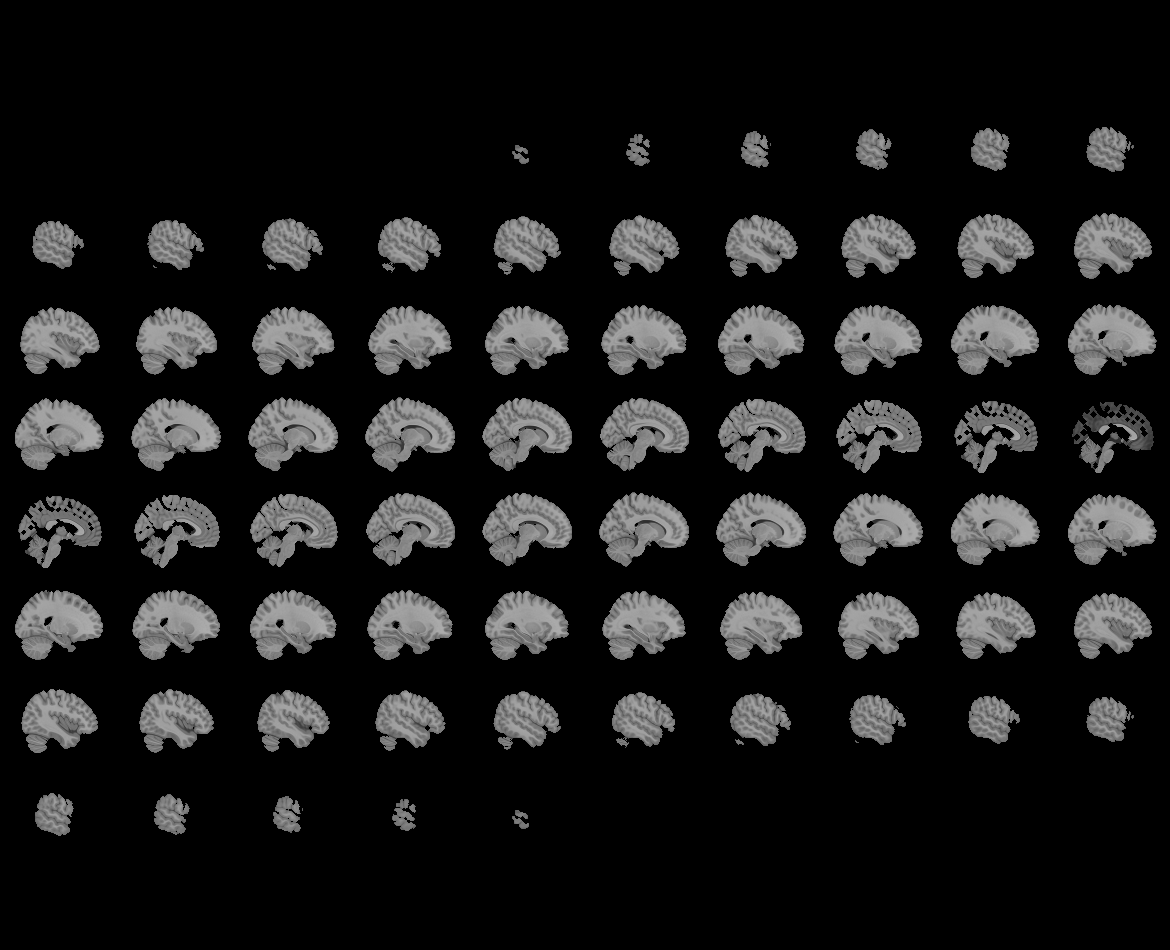
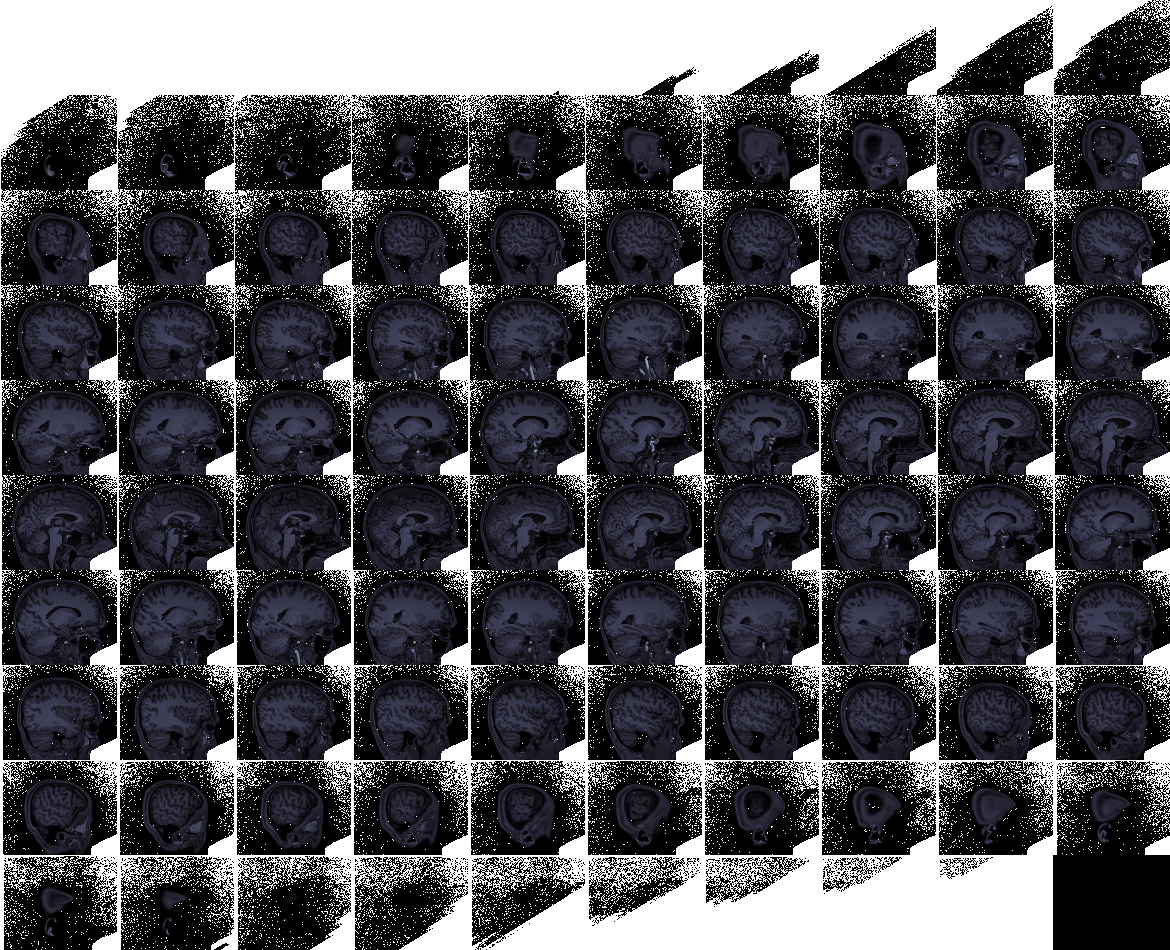

In [26]:
warnings.filterwarnings("ignore")
view_img(data_path_t1w_sub06,
        colorbar=False, 
        cmap='bone', 
        symmetric_cmap=False, 
        title='T1 weighted MRI')

This appears normal. How was this image taken?

In [27]:
t1w_sub06_bids.get_metadata()

{'AcquisitionMatrixPE': 256,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '14:35:56.487500',
 'BaseResolution': 256,
 'BodyPartExamined': 'BRAIN',
 'ConsistencyInfo': 'N4_VE11C_LATEST_20160120',
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20171215 GCC5.3.1',
 'DeviceSerialNumber': '45348',
 'DwellTime': 1.03e-05,
 'EchoTime': 0.00343,
 'FlipAngle': 7,
 'ImageOrientationPatientDICOM': [-0.0356256,
  0.999365,
  -1.13833e-08,
  0.0576839,
  0.00205632,
  -0.998333],
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS3D', 'DIS2D'],
 'InPlanePhaseEncodingDirectionDICOM': 'ROW',
 'InstitutionAddress': 'Franklin_Blvd_1440_Eugene_District_US_97403',
 'InstitutionName': 'Lewis_Building',
 'InstitutionalDepartmentName': 'Department',
 'InversionTime': 1.1,
 'MRAcquisitionType': '3D',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'Skyra',
 'Modality': 'MR',
 'ParallelReductionFactorInPlane': 2,
 'PartialFourier': 1,
 'PatientPo

In [28]:
warnings.filterwarnings("ignore")
view_img(data_path_t2w_sub06, 
         colorbar=False, 
         cmap='bone', 
         symmetric_cmap=False, 
         title='T2 weighted MRI');

It is visible that the occipital cortex is largely cut off. This is also the case for all participants... \
However, this was expected, as the study has a particular region of interest - the hippocampus. 

In [29]:
t2w_sub06_bids.get_metadata()

{'AcquisitionMatrixPE': 512,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '14:57:7.622500',
 'BaseResolution': 512,
 'BodyPartExamined': 'BRAIN',
 'ConsistencyInfo': 'N4_VE11C_LATEST_20160120',
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20171215 GCC5.3.1',
 'DeviceSerialNumber': '45348',
 'DwellTime': 4.4e-06,
 'EchoTime': 0.088,
 'EchoTrainLength': 18,
 'FlipAngle': 150,
 'ImageOrientationPatientDICOM': [0.997907,
  0.0386363,
  0.0518518,
  0.028095,
  0.463174,
  -0.885822],
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D'],
 'InPlanePhaseEncodingDirectionDICOM': 'ROW',
 'InstitutionAddress': 'Franklin_Blvd_1440_Eugene_District_US_97403',
 'InstitutionName': 'Lewis_Building',
 'InstitutionalDepartmentName': 'Department',
 'MRAcquisitionType': '2D',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'Skyra',
 'Modality': 'MR',
 'ParallelReductionFactorInPlane': 2,
 'PartialFourier': 1,
 'PatientPosition': 'HFS',
 

A reminder for myself: T1w and T2w images differ as a result of their repitition time (*TR*) and their echo time (*TE*). T1w images have short TRs and TEs to emphasize fatty tissue (contrast highest for white matter here), meanwhile T2w images emphasize both tissues containing fat and water. This [paper](https://radiology.queensu.ca/source/MR_Pulse_Sequences_What_Every_Radiologist_Wants_to_Know.pdf) helped

In [30]:
print("The repetition time for the T1w image is {}, while the repition time for the T2w image is {}."
      .format(t1w_sub06_bids.get_metadata()["RepetitionTime"], t2w_sub06_bids.get_metadata()["RepetitionTime"]))

print("The echo time for the T1w image is {}, while the echo time for the T2w image is {}."
      .format(t1w_sub06_bids.get_metadata()["EchoTime"], t2w_sub06_bids.get_metadata()["EchoTime"]))

The repetition time for the T1w image is 2.5, while the repition time for the T2w image is 13.52.
The echo time for the T1w image is 0.00343, while the echo time for the T2w image is 0.088.


## Exploration of the Task and the Functional Data
### Exploration of the Task

Firstly, I will take a look at the `event.tsv` files and then try to look at some of the functional data. 
It was previously mentioned that there are 8 runs, which involve two different tasks. These runs are actually only the last part of an experimental paradigm. Only a part of the tasks were performed within the fMRI. 

The event files available here therefore only partially cover the tasks. There are three parts of the experimental paradigm:

1. Study phase: Participants learned 36 scene-object associations. These consisted of 18 scene-object pairmates.
2. Test phase: The 36 scene object associations were tested. A scene was presented, then one of two objects had to be choosen: One was previously associated, one was the competitior (same object category, associated with different scene)
3. Exposure phase: Participants were exposed to the scene-object associations. There were two blocks per run, each block block included old/new judgement towards the 36 studied scenes **or** objects, as well as three novel lure scenes **or** objects. Between the blocks there was a short odd-even judgement task. 


The first and sixth round included object old-new judgements, the other runs followed the same procedure but using scenes. 

In [31]:
import pandas as pd
events_scene_sub06_run1 = pd.read_table('/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/sub-06/func/sub-06_task-scene_run-01_events.tsv')
print(events_scene_sub06_run1)

    onset  duration  correct trial_type  response_time
0      10         4      0.0       1_A9            NaN
1      14         4      1.0       1_A2       1.486898
2      18         4      1.0       1_A1       0.752162
3      22         4      1.0       1_B4       0.334689
4      26         4      1.0       1_B0       0.368064
..    ...       ...      ...        ...            ...
73    324         4      0.0      2_B16            NaN
74    328         4      1.0     foil05       0.735685
75    332         4      1.0      2_A17       0.534958
76    336         4      1.0     foil03       0.785550
77    340         4      1.0       2_A3       1.085914

[78 rows x 5 columns]


We therefore see, that this run had 78 items. Duration is shown as 4 seconds, but in reality this was stated to only be the case when there was no reaction - the task could have gone faster. The structure of the task is like this:

| What | Duration | Other |
| :-- | --- | --: |
| Presentation of a scene image | 500 ms |  |
| Red fixation cross | 1500 ms | Response "old/new" must be given|
| White fixation cross | 2000ms | Next trial starts|
||
| Repeated for 39 times, followed by odd/even judgement task, then another 39 scenes|
 

There **39 runs** consisted of **36 image-object pairs** that were the stimuli, as well as **three lure scenes**. All images were **repeated twice per run**! 
These 36 pairs themselves, consisted of **18 pairmates**, which could be visually or semantically similar!
Therefore, across the 8 runs there were 36 scenes and 12 objects that were simply lures, while the 36 original pairs are repeated twice per run!


How is the performance in the old-new judgement task across runs and by different task? 

In [32]:
run_1_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_2_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_3_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_4_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_5_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_6_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_7_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
run_8_performance = pd.DataFrame(columns=['path','correct', 'incorrect'])
from pathlib import Path
for file in Path("/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/ds003707/").glob('**/*.tsv'):
    event = pd.read_table(file)
    performance_events_correct = event["correct"].value_counts().loc[1.0]
    performance_events_incorrect = (len(events_scene_sub06_run1) - events_scene_sub06_run1["correct"].value_counts()[1.0])
    list_events = [(str(file)), performance_events_correct, performance_events_incorrect]    
    if "run-01" in str(file):
        run_1_performance.loc[len(run_1_performance)] = list_events
    elif "run-02" in str(file):
        run_2_performance.loc[len(run_2_performance)] = list_events
    elif "run-03" in str(file):
        run_3_performance.loc[len(run_3_performance)] = list_events
    elif "run-04" in str(file):
        run_4_performance.loc[len(run_4_performance)] = list_events
    elif "run-05" in str(file):
        run_5_performance.loc[len(run_5_performance)] = list_events
    elif "run-06" in str(file):
        run_6_performance.loc[len(run_6_performance)] = list_events
    elif "run-07" in str(file):
        run_7_performance.loc[len(run_7_performance)] = list_events
    elif "run-08" in str(file):
        run_8_performance.loc[len(run_8_performance)] = list_events
    else:
        print("Something went wrong")

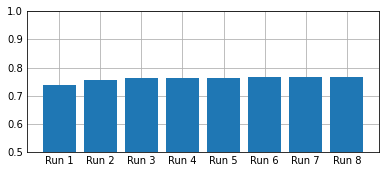

In [36]:
#Data wrangling to create a plot

run_1_sum = run_1_performance.sum()[1] + run_1_performance.sum()[2]
run_2_sum = run_2_performance.sum()[1] + run_2_performance.sum()[2]
run_3_sum = run_3_performance.sum()[1] + run_3_performance.sum()[2]
run_4_sum = run_4_performance.sum()[1] + run_4_performance.sum()[2]
run_5_sum = run_5_performance.sum()[1] + run_5_performance.sum()[2]
run_6_sum = run_6_performance.sum()[1] + run_6_performance.sum()[2]
run_7_sum = run_7_performance.sum()[1] + run_7_performance.sum()[2]
run_8_sum = run_8_performance.sum()[1] + run_8_performance.sum()[2]

run_1_performance_percent = ((run_1_performance.sum()[1] - run_1_performance.sum()[2])/ run_1_sum)
run_2_performance_percent = ((run_2_performance.sum()[1] - run_2_performance.sum()[2])/ run_2_sum)
run_3_performance_percent = ((run_3_performance.sum()[1] - run_3_performance.sum()[2])/ run_3_sum)
run_4_performance_percent = ((run_4_performance.sum()[1] - run_4_performance.sum()[2])/ run_4_sum)
run_5_performance_percent = ((run_5_performance.sum()[1] - run_5_performance.sum()[2])/ run_5_sum)
run_6_performance_percent = ((run_6_performance.sum()[1] - run_6_performance.sum()[2])/ run_6_sum)
run_7_performance_percent = ((run_7_performance.sum()[1] - run_7_performance.sum()[2])/ run_7_sum)
run_8_performance_percent = ((run_8_performance.sum()[1] - run_8_performance.sum()[2])/ run_8_sum)

run_performance = [run_1_performance_percent, run_2_performance_percent, run_3_performance_percent, run_4_performance_percent, run_5_performance_percent, run_6_performance_percent, run_7_performance_percent, run_8_performance_percent]


#Calling the right package. 
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

#Creating names for the runs
x = ["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Run 6", "Run 7", "Run 8"]

#Creating the plot
figsize=(20, 6)
plot = plt.bar(x, run_performance)

#Increasing figure size
fig = plt.gcf()
fig.set_size_inches(5, 2, forward=True)

#Setting the limits of the y-axis
ax = plt.gca()
ax.set(ylim=[0.5, 1]);

This is not a very well done graphic, but it shows that the performance within the old/new judgement task was above chance across runs. 

### Exploration of the Functional Data

Now onto the functional data for these runs! 
First, here is the meta-data for one run.

In [37]:
scene_run1_sub06_bold = layout.get(subject = ['06'], task = "scene")[1]
scene_run1_sub06_bold.get_metadata()

{'AcquisitionMatrixPE': 124,
 'AcquisitionNumber': 1,
 'AcquisitionTime': '14:42:50.105000',
 'BandwidthPerPixelPhaseEncode': 21.222,
 'BaseResolution': 124,
 'BodyPartExamined': 'BRAIN',
 'ConsistencyInfo': 'N4_VE11C_LATEST_20160120',
 'ConversionSoftware': 'dcm2niix',
 'ConversionSoftwareVersion': 'v1.0.20171215 GCC5.3.1',
 'DerivedVendorReportedEchoSpacing': 0.000760015,
 'DeviceSerialNumber': '45348',
 'DwellTime': 2.6e-06,
 'EchoTime': 0.036,
 'EchoTrainLength': 61,
 'EffectiveEchoSpacing': 0.000380007,
 'FlipAngle': 90,
 'ImageComments': 'Unaliased_MB3_PE4',
 'ImageOrientationPatientDICOM': [0.997698,
  0.0355807,
  0.0577256,
  -0.0526364,
  0.943048,
  0.328466],
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'MB', 'ND', 'NORM', 'MOSAIC'],
 'InPlanePhaseEncodingDirectionDICOM': 'COL',
 'InstitutionAddress': 'Franklin_Blvd_1440_Eugene_District_US_97403',
 'InstitutionName': 'Lewis_Building',
 'InstitutionalDepartmentName': 'Department',
 'MRAcquisitionType': '2D',
 'MagneticFieldStr

Above are the quality metrics for the first run of subject one. Next I will plot that run. As the data exists in four dimensions, you can't simply plot it. First I need to create a mean image. 

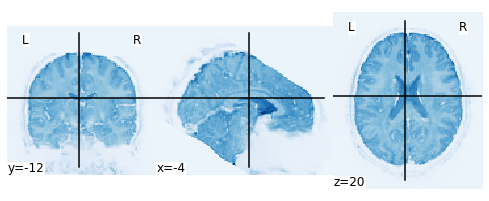

In [38]:
warnings.filterwarnings("ignore")
#File path for the preprocessed image
path_preproc_scene_sub06_run1 = '/home/tchaase/Documents/Universitaet/Forschungsmodul/project/data/outputs/fmri-prep_20.2.3-2/sub-06/sub-06_task-scene_run-01_desc-preproc_bold.nii.gz'
#Creating the mean image
mean_img_scene_sub06_run1 = mean_img(path_preproc_scene_sub06_run1)

plot_img(mean_img_scene_sub06_run1);

Below, there is an interactive plot of the functional run. This is not plotted optimally yet, but it does give allow to move the cross to see what areas are missing for the functional image.


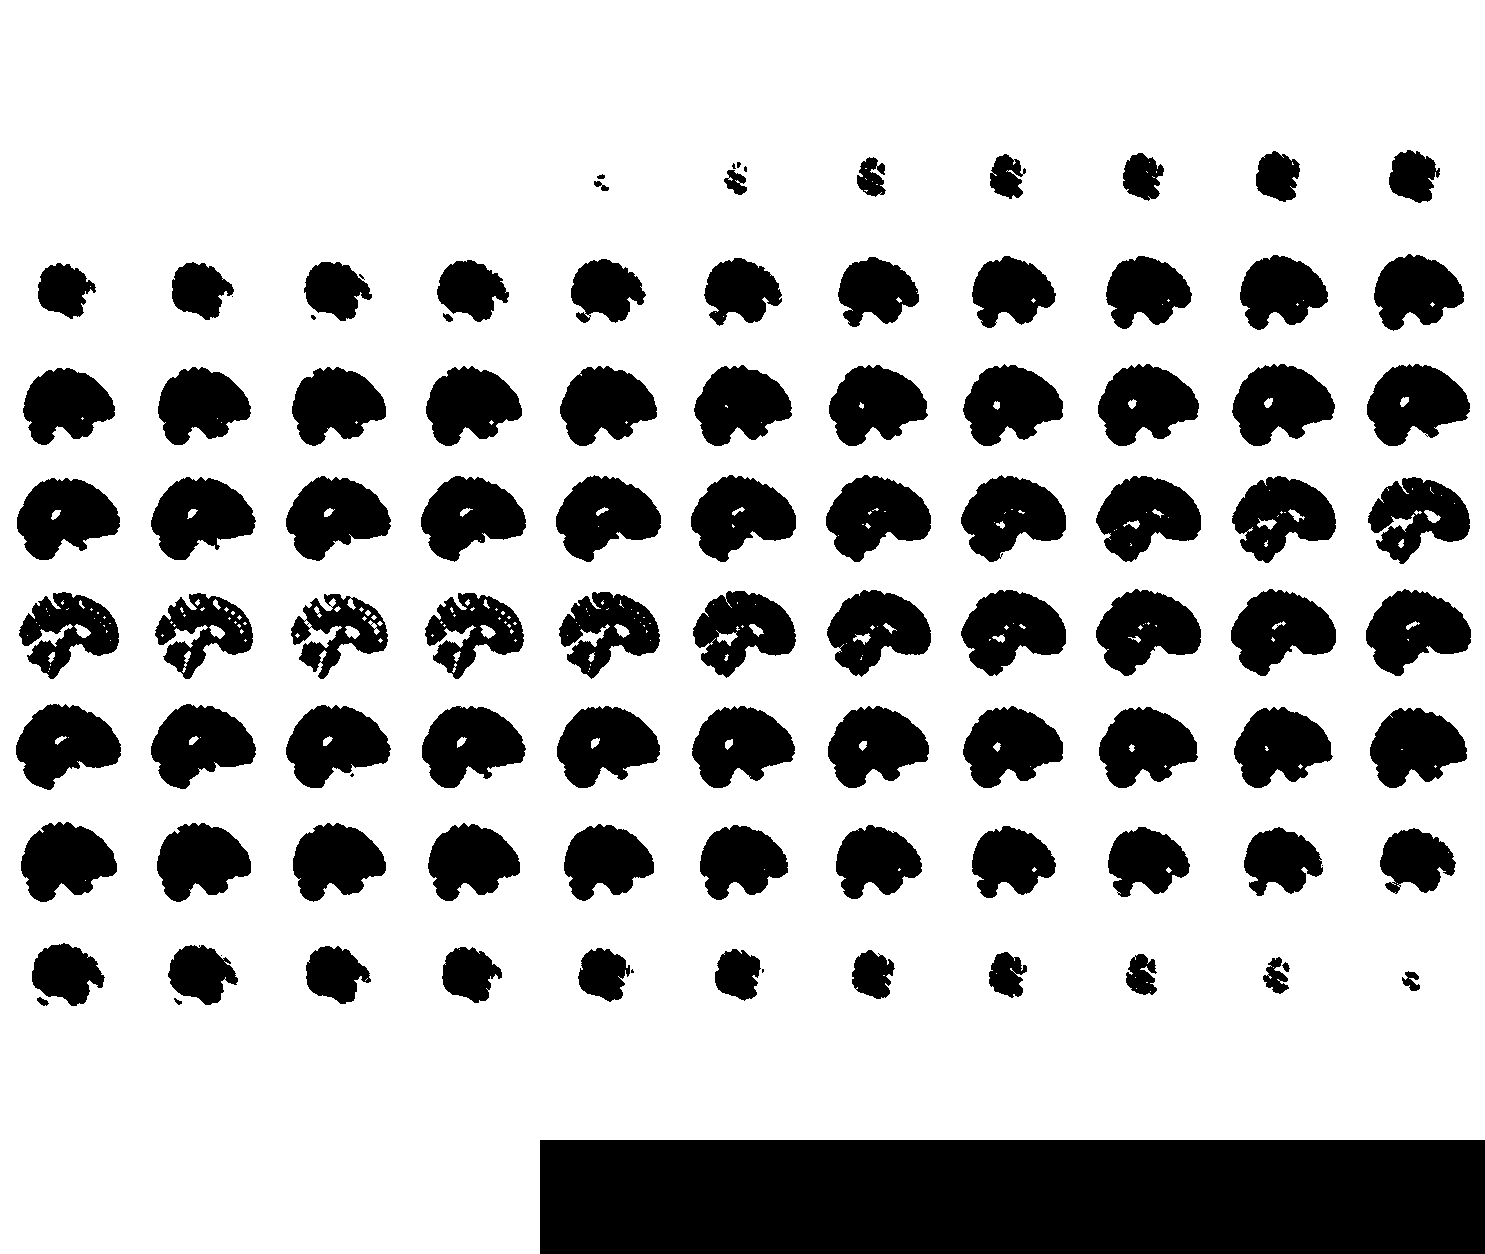
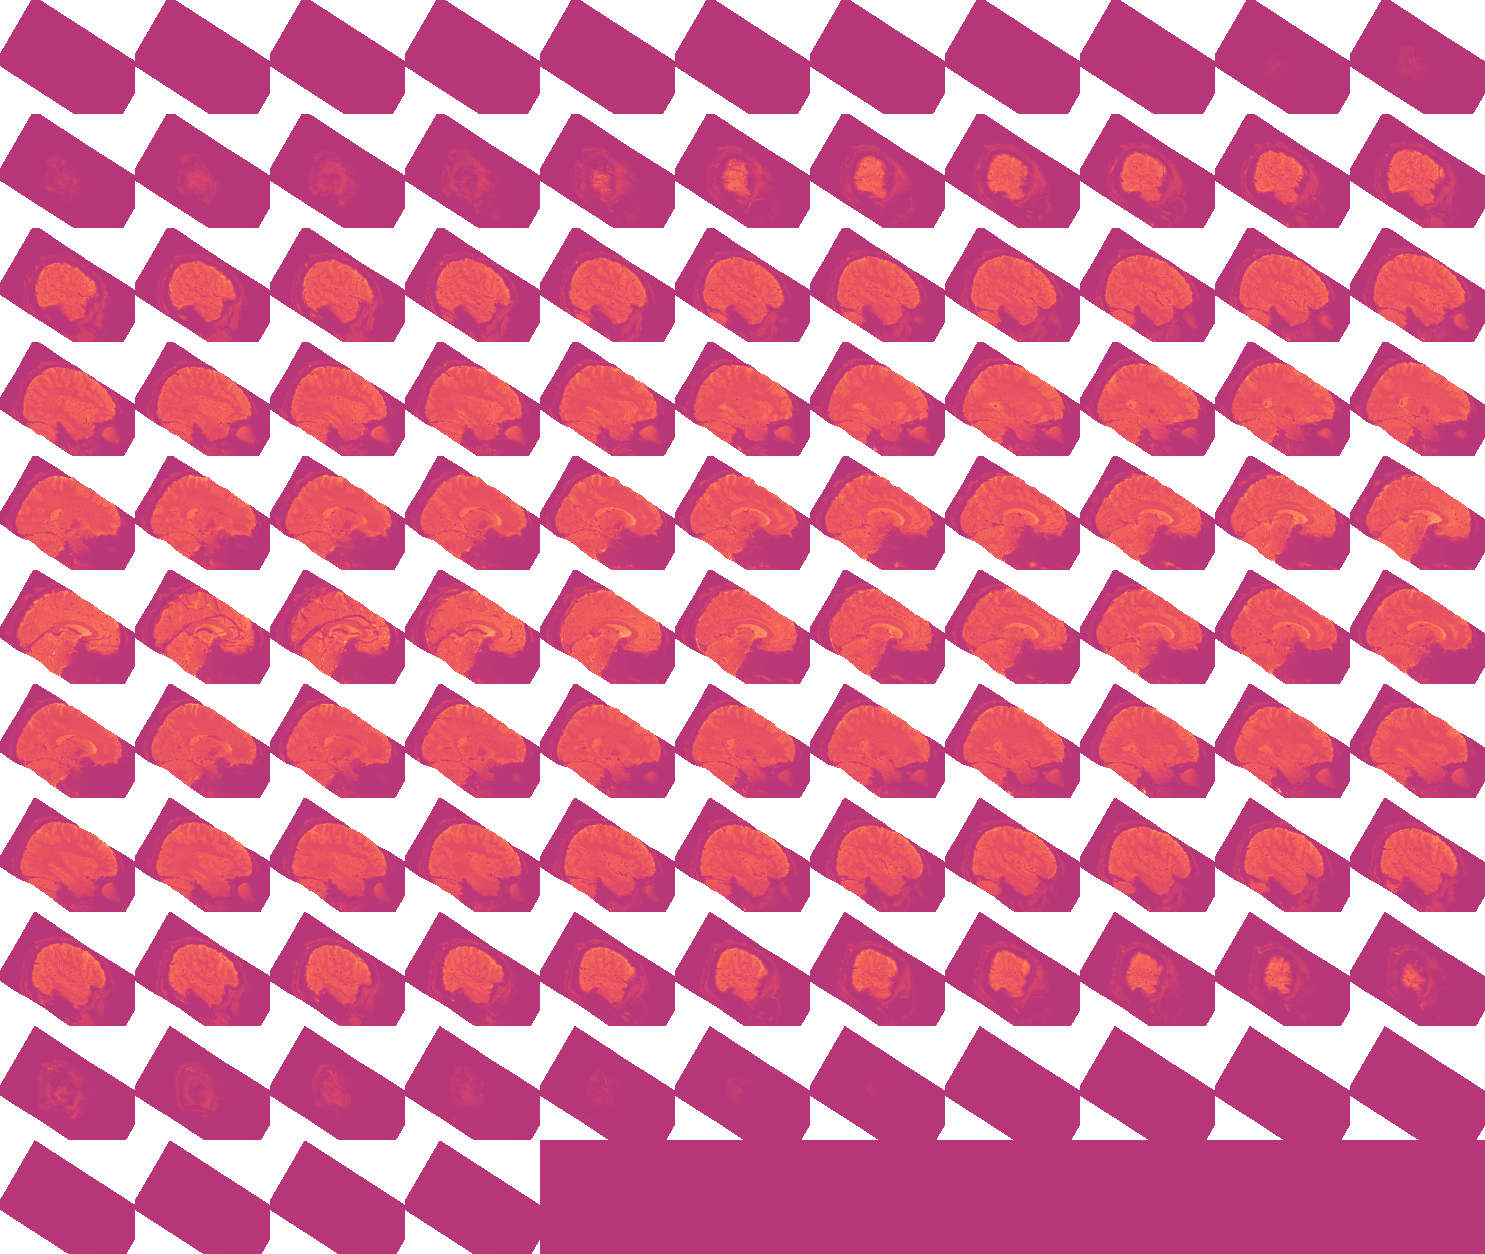

In [39]:
warnings.filterwarnings("ignore")
from nilearn.image import index_img

view_img(index_img(path_preproc_scene_sub06_run1, 1), 
         bg_img=None, 
         black_bg=False, 
         colorbar=False, 
         cmap='magma', 
         symmetric_cmap=False, 
         title='fMRI vol. of sub 6, run 1')

With both of these plots it becomes apparent that the BOLD image only has **partial brain** coverage! Parts of the frontal cortex are missing. This is intended, as the ROI of the analyses was the hippocampus, specifically the different subfields.  